In [1]:
from data import Data
from signals import Signals
import backtest as bt
import pandas as pd
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)

In [2]:
class Central(Signals):
    
    def __init__(self, login=5528104, senha='YUWNehok', servidor='ActivTradesCorp-Server', balance=1000):
        super().__init__(login, senha, servidor)
        self.balance = balance
        
    
    def back_tpsl(self, tpsl):
        """
        Returns
        list_backtest = Todos os trades
        sell_orders
        buy_orders
        """
        tot, sell, buy, each_pair =  bt.otimizado_tpsl(self.get_numpy_normal_data(), tpsl)
        tot = np.delete(tot, np.where(tot == 0.))
        sell = np.delete(sell, np.where(sell == 0.))
        buy = np.delete(buy, np.where(buy == 0.))
        results_df = pd.DataFrame()
        for index, value in enumerate(each_pair):
            results_df[super().ALL_PAIRS[index]] = pd.Series(np.delete(value, np.where(value == 0.)))
        return tot, sell, buy, results_df
    
    
    def back_no_tpsl(self):
        """
        Returns
        list_backtest = Todos os trades
        sell_orders
        buy_orders
        """
        tot, sell, buy = bt.otimizado_no_tpsl(self.get_numpy_normal_data())
        tot = np.delete(tot, np.where(tot == 0.))
        sell = np.delete(sell, np.where(sell == 0.))
        buy = np.delete(buy, np.where(buy == 0.))
        return tot, sell, buy
    
    
    def back_tpsl_ohl(self, tpsl):
        """
        Returns
        list_backtest = Todos os trades
        sell_orders
        buy_orders
        """
        tot, sell, buy = bt.otimizado_tpsl_ohl(self.get_numpy_normal_data(), tpsl)
        tot = np.delete(tot, np.where(tot == 0.))
        sell = np.delete(sell, np.where(sell == 0.))
        buy = np.delete(buy, np.where(buy == 0.))
        return tot, sell, buy

In [3]:
robot = Central()

In [5]:
robot.get_normal_data_csv('DataH163k.csv',drop=True,drop_list=['Unnamed: 0'])

Dados Carregados com Sucesso.


In [6]:
robot.get_normal_data()['EURUSD_Open']

0        1.20665
1        1.20650
2        1.20642
3        1.20660
4        1.20682
          ...   
62995    1.17623
62996    1.17622
62997    1.17624
62998    1.17604
62999    1.17627
Name: EURUSD_Open, Length: 63000, dtype: float64

In [7]:
robot.pct_data()

In [8]:
robot.pct_data_signals_std()

In [9]:
robot.get_normal_data().iloc[:,-56:].sum().sum()

95481

In [10]:
robot.normal_data_to_array()

In [11]:
%%time
tot, sell, buy, all_f = robot.back_tpsl(50)

c:\users\johnk\appdata\local\programs\python\python39\lib\site-packages\numba\core\dispatcher.py:241: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()


Wall time: 3.66 s


In [12]:
robot.get_numpy_normal_data()[16]

array([[0.71622, 0.7162 , 0.71621, ..., 0.70334, 0.70399, 0.70399],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 1.     , 1.     ],
       [1.68654, 1.68692, 1.687  , ..., 1.67275, 1.67039, 1.66999],
       [0.71623, 0.71629, 0.71622, ..., 0.70334, 0.70399, 0.70399],
       [0.71618, 0.71612, 0.71618, ..., 0.70334, 0.70399, 0.70399]])

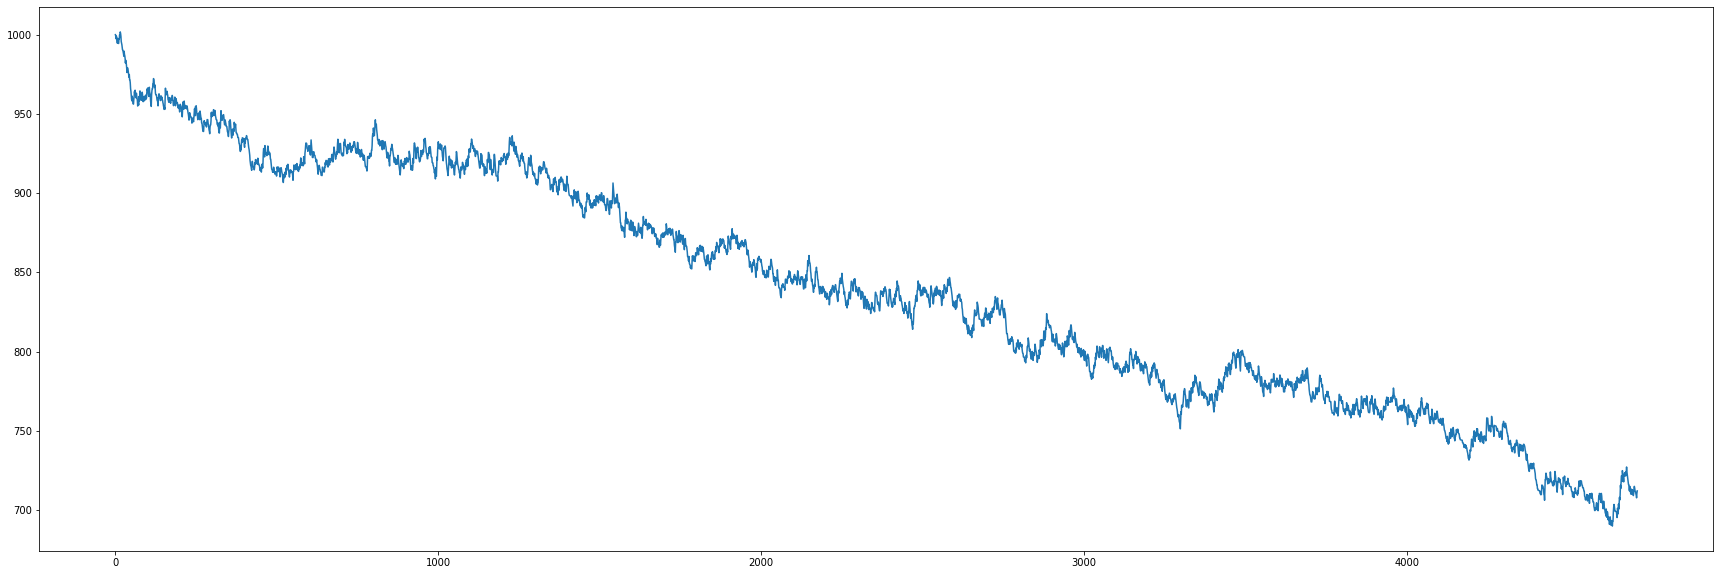

In [13]:
plt.plot(tot)

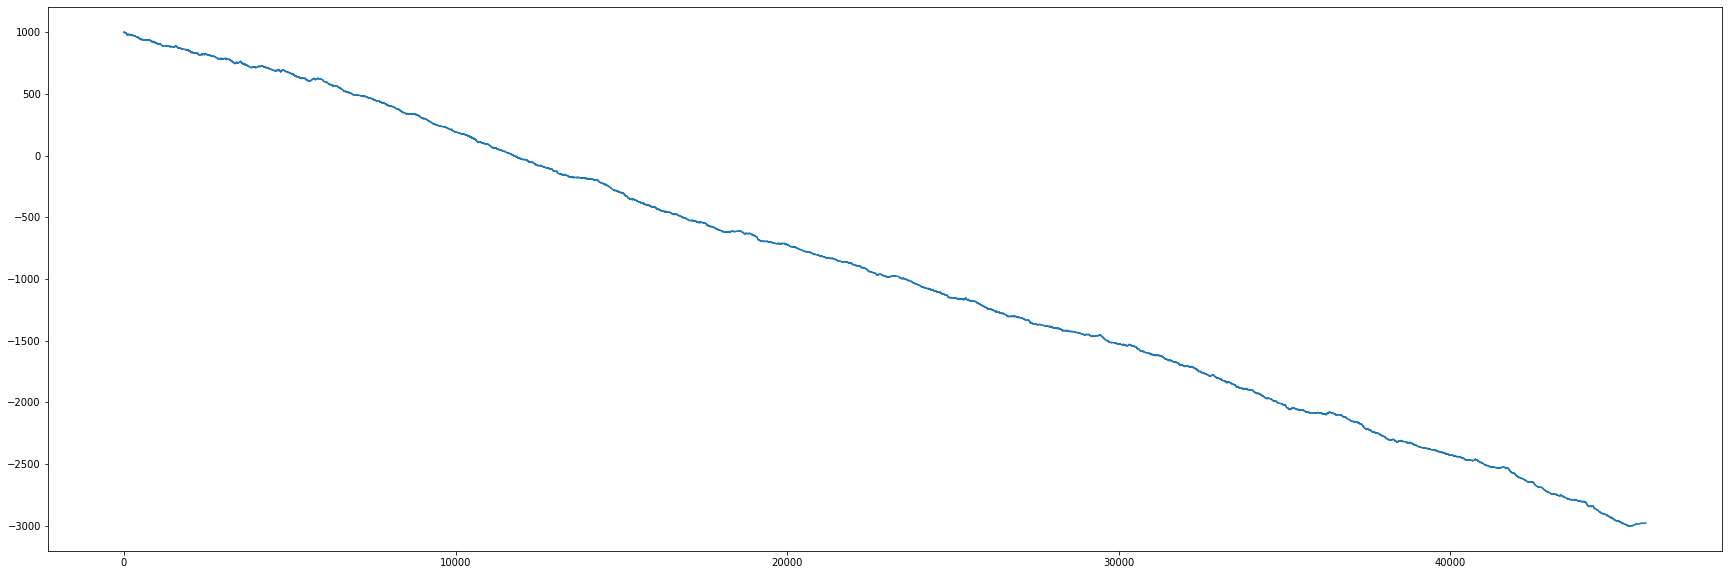

In [14]:
tot2, _, _ = robot.back_no_tpsl()
plt.plot(tot2)

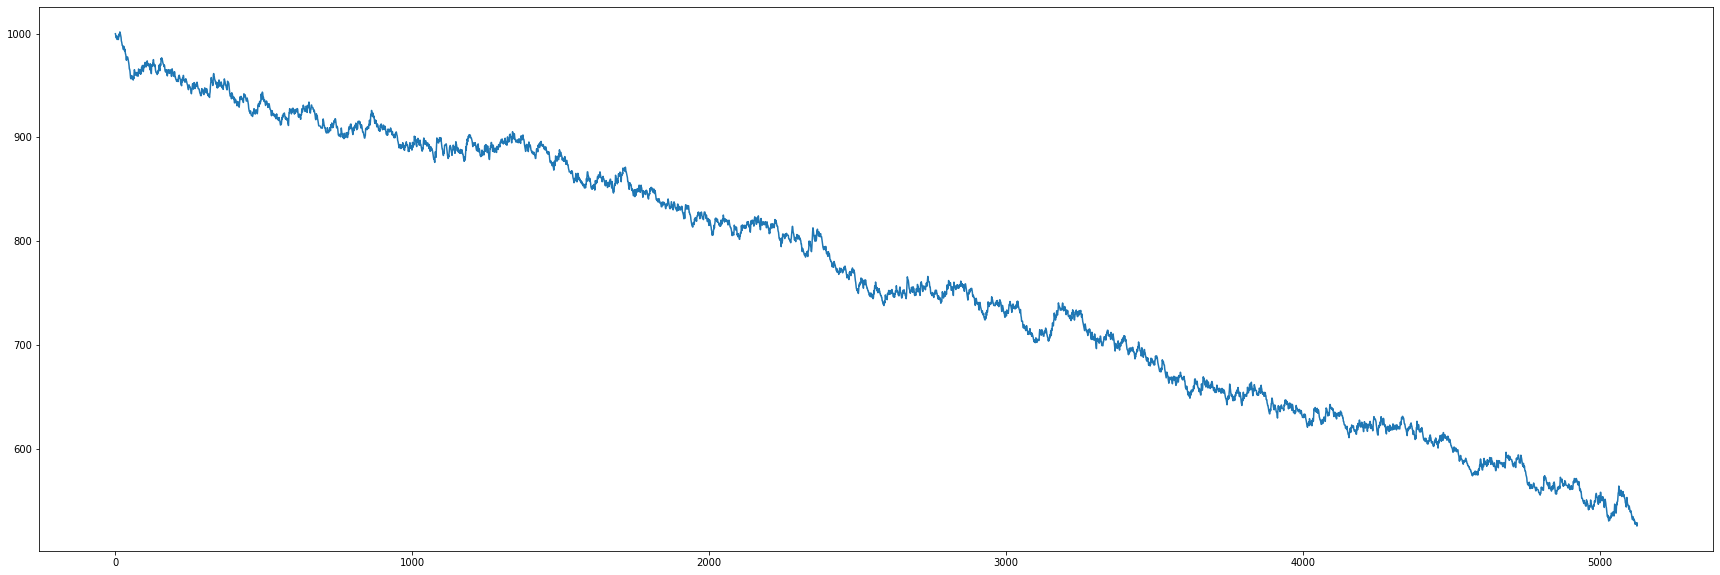

In [15]:
tot3, _, _ = robot.back_tpsl_ohl(50)
plt.plot(tot3)

- Rever a colocação dos backtestes por conta do lucro ridiculo
- Colocar o super backtest de 1.3kk
- Se sobrar tempo, pensar em passar os calculos para pandas